In [1]:
import tensorflow.keras.backend as K
import multiprocessing

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import csv
import math
import random
import logging

from gensim.models.word2vec import Word2Vec

from nltk.stem.lancaster import LancasterStemmer
from nltk.tokenize import RegexpTokenizer

In [2]:
# Set random seed (for reproducibility)
np.random.seed(1000)

In [3]:
#dataset_location = './datasets/sarcasm_v2.csv'
dataset_location = './datasets/text_and_annorations.csv'
model_location = './word2vec/'

corpus = []
labels = []

In [4]:
#Shuffle the dataset

ip=open(dataset_location,'r', encoding="utf8")
next(ip)   #ignore the first row (label row)
li = ip.readlines()
random.shuffle(li)

#dataset_location = './datasets/shuffled_sarcasm_v2.csv'
dataset_location = './datasets/shuffled_text_and_annotations.csv'

fid = open(dataset_location, "w", encoding="utf8")
fid.writelines(li)
fid.close()

In [5]:
# Parse tweets and sentiments       
with open(dataset_location, 'r', encoding="utf8") as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    
    #skip the first line?
    #next(csvReader)
    
    for row in csvReader:
        #corpus.append(row[3] + " - " + row[4])
        corpus.append(row[1])

        #Sarcasm label, (0 = not sarcasm, 1 = sarcasm)
        #pol = 1 if row[1] == 'sarc' else 0
        pol = 1 if row[5] == 'Yes' else 0
        labels.append(pol)
        
print('Corpus size: {}'.format(len(corpus)))

Corpus size: 994


In [6]:
# Tokenize and stem
tkr = RegexpTokenizer('[a-zA-Z0-9@]+')
#stemmer = LancasterStemmer()

tokenized_corpus = []

for i, tweet in enumerate(corpus):
    #tokens = [stemmer.stem(t) for t in tkr.tokenize(tweet) if not t.startswith('@')]
    tokens = [t for t in tkr.tokenize(tweet) if not t.startswith('@')]
    tokenized_corpus.append(tokens)

In [7]:
# Gensim Word2Vec model
vector_size = 300
window_size = 10

In [8]:
# Create Word2Vec
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
word2vec = Word2Vec(sentences=tokenized_corpus,
                    size=vector_size, 
                    window=window_size, 
                    negative=20,
                    iter=50,
                    seed=1000,
                    workers=multiprocessing.cpu_count(),
                    sg=1)

2020-06-04 12:33:59,915 : INFO : collecting all words and their counts
2020-06-04 12:33:59,916 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-06-04 12:33:59,922 : INFO : collected 4545 word types from a corpus of 23411 raw words and 994 sentences
2020-06-04 12:33:59,923 : INFO : Loading a fresh vocabulary
2020-06-04 12:33:59,927 : INFO : effective_min_count=5 retains 636 unique words (13% of original 4545, drops 3909)
2020-06-04 12:33:59,928 : INFO : effective_min_count=5 leaves 17755 word corpus (75% of original 23411, drops 5656)
2020-06-04 12:33:59,931 : INFO : deleting the raw counts dictionary of 4545 items
2020-06-04 12:33:59,933 : INFO : sample=0.001 downsamples 72 most-common words
2020-06-04 12:33:59,934 : INFO : downsampling leaves estimated 11628 word corpus (65.5% of prior 17755)
2020-06-04 12:33:59,937 : INFO : estimated required memory for 636 words and 300 dimensions: 1844400 bytes
2020-06-04 12:33:59,937 : INFO : resetting layer weights


2020-06-04 12:34:03,688 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-04 12:34:03,693 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-04 12:34:03,694 : INFO : EPOCH - 15 : training on 23411 raw words (11643 effective words) took 0.2s, 49152 effective words/s
2020-06-04 12:34:03,700 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-04 12:34:03,777 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-04 12:34:03,917 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-04 12:34:03,923 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-04 12:34:03,924 : INFO : EPOCH - 16 : training on 23411 raw words (11590 effective words) took 0.2s, 51178 effective words/s
2020-06-04 12:34:03,931 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-04 12:34:04,012 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-0

2020-06-04 12:34:07,526 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-04 12:34:07,629 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-04 12:34:07,783 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-04 12:34:07,790 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-04 12:34:07,791 : INFO : EPOCH - 32 : training on 23411 raw words (11639 effective words) took 0.3s, 43491 effective words/s
2020-06-04 12:34:07,799 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-04 12:34:07,884 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-04 12:34:08,032 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-04 12:34:08,038 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-04 12:34:08,039 : INFO : EPOCH - 33 : training on 23411 raw words (11615 effective words) took 0.2s, 47622 effective words/s
2020-0

2020-06-04 12:34:11,726 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-04 12:34:11,727 : INFO : EPOCH - 48 : training on 23411 raw words (11636 effective words) took 0.2s, 51570 effective words/s
2020-06-04 12:34:11,738 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-04 12:34:11,825 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-04 12:34:11,969 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-04 12:34:11,974 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-04 12:34:11,975 : INFO : EPOCH - 49 : training on 23411 raw words (11619 effective words) took 0.2s, 48628 effective words/s
2020-06-04 12:34:11,988 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-04 12:34:12,075 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-04 12:34:12,232 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-0

In [9]:
# Copy word vectors and delete Word2Vec model and original corpus to save memory
X_vecs = word2vec.wv
del word2vec
del corpus

In [10]:
# Train subset size (0 < size < len(tokenized_corpus))
train_size = math.floor(0.8 * len(tokenized_corpus))

# Test subset size (0 < size < len(tokenized_corpus) - train_size)
test_size = len(tokenized_corpus) - train_size

# Compute average and max tweet length
avg_length = 0.0
max_length = 0

for tweet in tokenized_corpus:
    if len(tweet) > max_length:
        max_length = len(tweet)
    avg_length += float(len(tweet))
    
print('Average tweet length: {}'.format(avg_length / float(len(tokenized_corpus))))
print('Max tweet length: {}'.format(max_length))

Average tweet length: 23.5523138832998
Max tweet length: 201


In [11]:
# Tweet max length (number of tokens)
max_tweet_length = max_length

In [12]:
# Create train and test sets
# Generate random indexes
indexes = set(np.random.choice(len(tokenized_corpus), train_size + test_size, replace=False))

X_train = np.zeros((train_size, max_tweet_length, vector_size), dtype=K.floatx())
Y_train = np.zeros((train_size, 2), dtype=np.int32)
X_test = np.zeros((test_size, max_tweet_length, vector_size), dtype=K.floatx())
Y_test = np.zeros((test_size, 2), dtype=np.int32)

for i, index in enumerate(indexes):
    for t, token in enumerate(tokenized_corpus[index]):
        if t >= max_tweet_length:
            break
        
        if token not in X_vecs:
            continue
    
        if i < train_size:
            X_train[i, t, :] = X_vecs[token]
        else:
            X_test[i - train_size, t, :] = X_vecs[token]
            
    if i < train_size:
        Y_train[i, :] = [1.0, 0.0] if labels[index] == 0 else [0.0, 1.0]
    else:
        Y_test[i - train_size, :] = [1.0, 0.0] if labels[index] == 0 else [0.0, 1.0] 

In [13]:
batch_size = 16
nb_epochs = 20

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_shape=(max_tweet_length, vector_size)))
model.add(tf.keras.layers.GRU(128, return_sequences='true'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 201, 64)           19264     
_________________________________________________________________
gru (GRU)                    (None, 201, 128)          74496     
_________________________________________________________________
flatten (Flatten)            (None, 25728)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 51458     
Total params: 145,218
Trainable params: 145,218
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [15]:
# Fit the model
history = model.fit(X_train, Y_train,
          batch_size=batch_size,
          shuffle=True,
          epochs=nb_epochs,
          validation_data=(X_test, Y_test))

Train on 795 samples, validate on 199 samples
Epoch 1/20
795/795 [==============================] - 13s 17ms/sample - loss: 0.6451 - accuracy: 0.6289 - val_loss: 0.5923 - val_accuracy: 0.6633
Epoch 2/20
795/795 [==============================] - 10s 13ms/sample - loss: 0.6101 - accuracy: 0.6440 - val_loss: 0.5702 - val_accuracy: 0.6583
Epoch 3/20
795/795 [==============================] - 11s 14ms/sample - loss: 0.5883 - accuracy: 0.7145 - val_loss: 0.5473 - val_accuracy: 0.6985
Epoch 4/20
795/795 [==============================] - 10s 12ms/sample - loss: 0.5496 - accuracy: 0.7610 - val_loss: 0.4965 - val_accuracy: 0.8593
Epoch 5/20
795/795 [==============================] - 10s 12ms/sample - loss: 0.4785 - accuracy: 0.8340 - val_loss: 0.4546 - val_accuracy: 0.8643
Epoch 6/20
795/795 [==============================] - 11s 14ms/sample - loss: 0.4415 - accuracy: 0.8667 - val_loss: 0.4517 - val_accuracy: 0.8643
Epoch 7/20
795/795 [==============================] - 11s 14ms/sample - loss: 

In [16]:
loss, accuracy = model.evaluate(X_test, Y_test)

print("Loss: ", "%.3f" % loss)
print("Accuracy: ", "%.3f" % accuracy)

199/199 [==============================] - 0s 2ms/sample - loss: 0.4422 - accuracy: 0.8693
Loss:  0.442
Accuracy:  0.869


# Graph

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

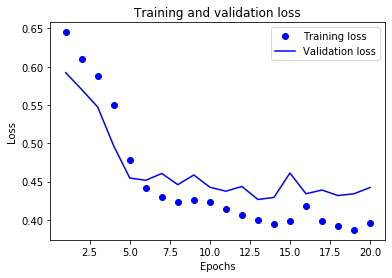

In [18]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

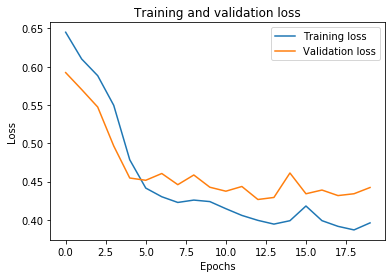

In [19]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();
plt.show()

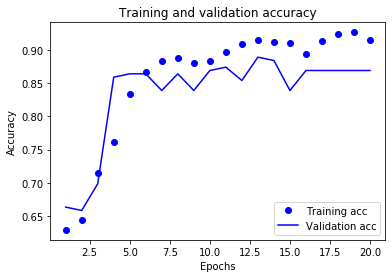

In [20]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

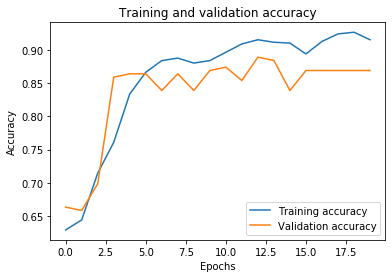

In [21]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()